# SIFT

In [1]:
from utils.sift import SIFT
import os
from tqdm import tqdm
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sift = SIFT()

In [3]:
# Function to load images and compute HOG descriptors
def load_images_from_folder(folder):
    reference_features = {}
    for label in os.listdir(folder):
        if label not in ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]:
            continue  # Skip any non-relevant files or directories
        path = os.path.join(folder, label)
        print(f'start feature extraction {label}')
        reference_images = []
        for filename in tqdm(os.listdir(path)):
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                reference_images.append(img)
        reference_features[label] = sift.extract_sift_features(reference_images)

    return reference_features

In [4]:
train_folder = 'datasets/dataset1/train'

In [5]:
reference_features = load_images_from_folder(train_folder)

start feature extraction angry


100%|██████████| 3995/3995 [00:00<00:00, 21096.59it/s]


start feature extraction disgust


100%|██████████| 436/436 [00:00<00:00, 20831.53it/s]


start feature extraction fear


100%|██████████| 4097/4097 [00:00<00:00, 22100.55it/s]


start feature extraction happy


100%|██████████| 7215/7215 [00:00<00:00, 22049.81it/s]


start feature extraction neutral


100%|██████████| 4965/4965 [00:00<00:00, 10138.92it/s]


start feature extraction sad


100%|██████████| 4830/4830 [00:00<00:00, 9992.06it/s] 


start feature extraction surprise


100%|██████████| 3171/3171 [00:00<00:00, 9972.83it/s]


In [6]:
def load_and_classify_test_images(test_folder, reference_features):
    predictions = []
    true_labels = []
    expressions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
    expression_indices = {expression: idx for idx, expression in enumerate(expressions)}

    for label in os.listdir(test_folder):
        if label in expressions:
            label_idx = expression_indices[label]
            path = os.path.join(test_folder, label)
            for filename in tqdm(os.listdir(path)):
                img_path = os.path.join(path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    # Sınıflandırma fonksiyonunu kullanarak yüz ifadesini tahmin edin
                    predicted_expression, _ = sift.classify_expression(img, reference_features)
                    predictions.append(expression_indices[predicted_expression])
                    true_labels.append(label_idx)

    return true_labels, predictions

### SIFT TEST on DATASET 1

In [7]:
test_folder = 'datasets/dataset1/test'
true_labels, predictions = load_and_classify_test_images(test_folder, reference_features)

100%|██████████| 831/831 [01:52<00:00,  7.40it/s]


In [8]:
expressions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
report = classification_report(true_labels, predictions, target_names=expressions)
conf_matrix = confusion_matrix(true_labels, predictions)

In [9]:
print(report)

              precision    recall  f1-score   support

       angry       0.21      0.63      0.31       958
     disgust       0.11      0.59      0.18       111
        fear       0.48      0.46      0.47      1024
       happy       0.60      0.22      0.32      1774
     neutral       0.46      0.23      0.31      1233
         sad       0.50      0.29      0.37      1247
    surprise       0.66      0.57      0.61       831

    accuracy                           0.37      7178
   macro avg       0.43      0.43      0.37      7178
weighted avg       0.49      0.37      0.38      7178



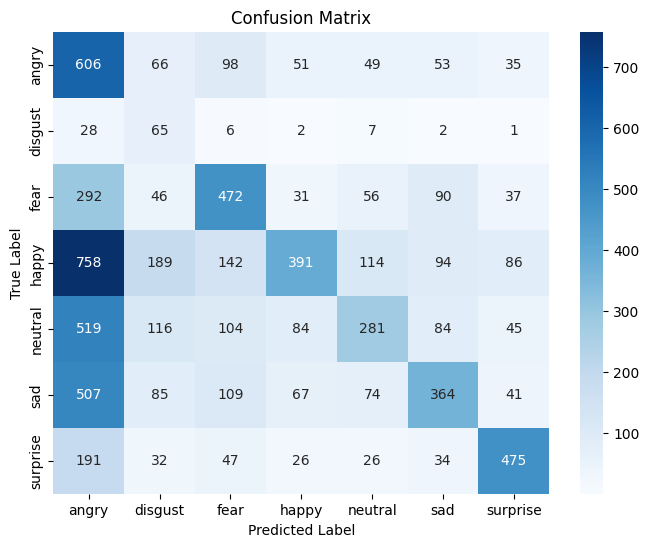

In [10]:
# Confusion matrix'i görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=expressions, yticklabels=expressions)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [11]:
train_folder = 'datasets/dataset2/train'

In [12]:
reference_features = load_images_from_folder(train_folder)

start feature extraction angry


100%|██████████| 3993/3993 [00:00<00:00, 21086.09it/s]


start feature extraction disgust


100%|██████████| 436/436 [00:00<00:00, 19884.49it/s]


start feature extraction fear


100%|██████████| 4103/4103 [00:00<00:00, 22014.54it/s]


start feature extraction happy


100%|██████████| 7164/7164 [00:00<00:00, 21728.83it/s]


start feature extraction neutral


100%|██████████| 4982/4982 [00:00<00:00, 22020.52it/s]


start feature extraction sad


100%|██████████| 4938/4938 [00:00<00:00, 22141.50it/s]


start feature extraction surprise


100%|██████████| 3205/3205 [00:00<00:00, 22025.48it/s]


### SIFT TEST on DATASET 2

In [13]:
test_folder = 'datasets/dataset2/test'
true_labels, predictions = load_and_classify_test_images(test_folder, reference_features)

100%|██████████| 797/797 [01:52<00:00,  7.07it/s]


In [14]:
expressions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
report = classification_report(true_labels, predictions, target_names=expressions)
conf_matrix = confusion_matrix(true_labels, predictions)

In [15]:
print(report)

              precision    recall  f1-score   support

       angry       0.22      0.66      0.33       960
     disgust       0.10      0.58      0.18       111
        fear       0.47      0.44      0.45      1018
       happy       0.63      0.23      0.34      1825
     neutral       0.43      0.20      0.27      1216
         sad       0.51      0.30      0.38      1139
    surprise       0.66      0.52      0.58       797

    accuracy                           0.36      7066
   macro avg       0.43      0.42      0.36      7066
weighted avg       0.49      0.36      0.37      7066



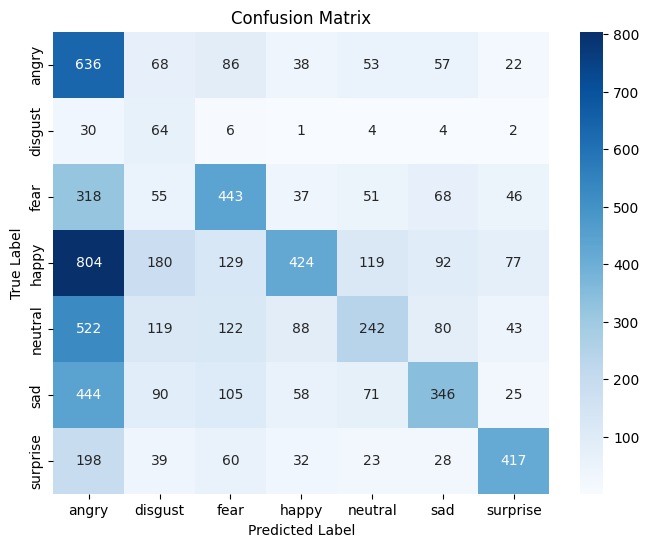

In [16]:
# Confusion matrix'i görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=expressions, yticklabels=expressions)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### CUSTOM TEST

In [17]:
# Now we can classify a new test image
test_image_path = 'bad_and_good_samples/happy4.jpg'
test_img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)

# Classify the expression of the test image
predicted_expression, all_matches = sift.classify_expression(test_img, reference_features)

print(f'The predicted expression is: {predicted_expression}')

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'cv::SIFT_Impl::detectAndCompute'


In [ ]:
# Now we can classify a new test image
test_image_path = 'bad_and_good_samples/happy3.jpg'
test_img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)

# Classify the expression of the test image
predicted_expression, all_matches = sift.classify_expression(test_img, reference_features)

print(f'The predicted expression is: {predicted_expression}')